## Libraries and Data Loading

In [1]:
import pandas as pd
from datetime import datetime, date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest as ztest
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


def data_statistics(df, gv_overall):
    pvalue_shapirowilk = []
    pvalue_ztest = []
    pvalue_kstest = []
    
    data = df.describe().round(2).T
    data = data.drop(['count'], axis=1)

    for column in df:
        stat, p = shapiro(df[column])
        pvalue_shapirowilk.append(p)
        stat1, p1 = ztest(df[gv_overall], df[column], value=0)
        pvalue_ztest.append(p1)
        stat2, p2 = stats.ks_2samp(df[gv_overall], df[column])
        pvalue_kstest.append(p2)
        

    data['pvalue-shapirowilk'] = pvalue_shapirowilk
    data['pvalue-ztest'] = pvalue_ztest
    data['pvalue-kstest'] = pvalue_kstest

    data = data.round(3)

    data.loc[data['pvalue-shapirowilk'] < 0.05, 'pvalue-shapirowilk'] = '<0.05'
    data.loc[data['pvalue-ztest'] < 0.05, 'pvalue-ztest'] = '<0.05'
    data.loc[data['pvalue-ztest'] == 1, 'pvalue-ztest'] = ''
    data.loc[data['pvalue-kstest'] < 0.05, 'pvalue-kstest'] = '<0.05'
    data.loc[data['pvalue-kstest'] == 1, 'pvalue-kstest'] = ''
    
    return data

In [2]:
path = r'' # Path to single CSV with all data from HypoGV scripts
df = pd.read_csv(path, index_col=None)
pd.set_option('display.max_columns', None)

## TOR<70

In [3]:
df1 = df[[
    'TOR<70 [%] - Overall40', 
    'TOR<70 [%] - 48 Hours before BL40', 'TOR<70 [%] - 48 Hours before BL50', 'TOR<70 [%] - 48 Hours before BL60', 
    'TOR<70 [%] - 24 Hours before BL40', 'TOR<70 [%] - 24 Hours before BL50', 'TOR<70 [%] - 24 Hours before BL60', 
    'TOR<70 [%] - 12 Hours before BL40', 'TOR<70 [%] - 12 Hours before BL50', 'TOR<70 [%] - 12 Hours before BL60', 
    'TOR<70 [%] - 6 Hours before BL40', 'TOR<70 [%] - 6 Hours before BL50', 'TOR<70 [%] - 6 Hours before BL60', 
    'TOR<70 [%] - 3 Hours before BL40', 'TOR<70 [%] - 3 Hours before BL50', 'TOR<70 [%] - 3 Hours before BL60', 
    'TOR<70 [%] - 3 Hours after BL40', 'TOR<70 [%] - 3 Hours after BL50', 'TOR<70 [%] - 3 Hours after BL60',  
    'TOR<70 [%] - 6 Hours after BL40', 'TOR<70 [%] - 6 Hours after BL50', 'TOR<70 [%] - 6 Hours after BL60', 
    'TOR<70 [%] - 12 Hours after BL40', 'TOR<70 [%] - 12 Hours after BL50', 'TOR<70 [%] - 12 Hours after BL60', 
    'TOR<70 [%] - 24 Hours after BL40', 'TOR<70 [%] - 24 Hours after BL50', 'TOR<70 [%] - 24 Hours after BL60', 
    'TOR<70 [%] - 48 Hours after BL40', 'TOR<70 [%] - 48 Hours after BL50', 'TOR<70 [%] - 48 Hours after BL60',  
]]

# Replace infinite updated data with nan
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df1.dropna(inplace=True)

data_statistics(df1, 'TOR<70 [%] - Overall40')

,mean,std,min,25%,50%,75%,max,pvalue-shapirowilk,pvalue-ztest,pvalue-kstest
TOR<70 [%] - Overall40,4.09,3.06,0.23,1.74,3.33,5.69,16.97,<0.05,,
TOR<70 [%] - 48 Hours before BL40,6.48,3.79,0.00,3.65,5.82,8.81,21.18,<0.05,<0.05,<0.05
TOR<70 [%] - 48 Hours before BL50,6.44,3.82,0.91,3.82,5.29,8.94,20.68,<0.05,<0.05,<0.05
TOR<70 [%] - 48 Hours before BL60,6.44,3.82,0.91,3.82,5.29,8.94,20.68,<0.05,<0.05,<0.05
TOR<70 [%] - 24 Hours before BL40,8.02,4.08,0.00,4.92,7.13,10.74,21.89,<0.05,<0.05,<0.05
TOR<70 [%] - 24 Hours before BL50,7.99,4.20,1.07,5.12,6.77,10.63,22.91,<0.05,<0.05,<0.05
TOR<70 [%] - 24 Hours before BL60,7.99,4.20,1.07,5.12,6.77,10.63,22.91,<0.05,<0.05,<0.05
TOR<70 [%] - 12 Hours before BL40,10.58,5.10,0.00,6.91,9.76,13.92,26.39,<0.05,<0.05,<0.05
TOR<70 [%] - 12 Hours before BL50,10.46,5.06,1.36,7.10,9.20,13.25,31.56,<0.05,<0.05,<0.05
TOR<70 [%] - 12 Hours before BL60,9.07,4.33,1.84,5.99,8.07,11.19,27.19,<0.05,<0.05,<0.05


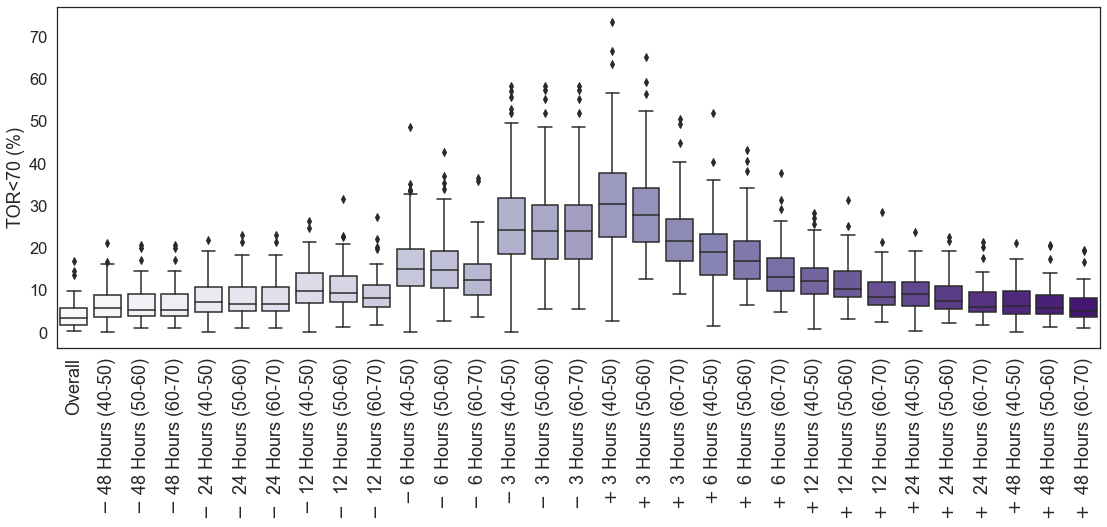

In [4]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (18.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df1.head(102), palette="Purples")


plt.ylabel("TOR<70 (%)") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-50)', '$\minus$ 48 Hours (50-60)', '$\minus$ 48 Hours (60-70)',  
    '$\minus$  24 Hours (40-50)', '$\minus$  24 Hours (50-60)', '$\minus$  24 Hours (60-70)', 
    '$\minus$ 12 Hours (40-50)', '$\minus$  12 Hours (50-60)', '$\minus$  12 Hours (60-70)', 
    '$\minus$ 6 Hours (40-50)', '$\minus$  6 Hours (50-60)', '$\minus$  6 Hours (60-70)', 
    '$\minus$ 3 Hours (40-50)', '$\minus$  3 Hours (50-60)', '$\minus$  3 Hours (60-70)', 
    '$\plus$ 3 Hours (40-50)', '$\plus$  3 Hours (50-60)', '$\plus$  3 Hours (60-70)', 
    '$\plus$ 6 Hours (40-50)', '$\plus$  6 Hours (50-60)',  '$\plus$  6 Hours (60-70)', 
    '$\plus$ 12 Hours (40-50)', '$\plus$  12 Hours (50-60)', '$\plus$  12 Hours (60-70)', 
    '$\plus$ 24 Hours (40-50)', '$\plus$  24 Hours (50-60)', '$\plus$  24 Hours (60-70)', 
    '$\plus$ 48 Hours (40-50)', '$\plus$  48 Hours (50-60)', '$\plus$  48 Hours (60-70)', 
])

ax.tick_params(axis='x', rotation=90)

In [5]:
df2 = df[[
    'TOR<70 [%] - Overall40', 
    'TOR<70 [%] - 48 Hours before BL54', 'TOR<70 [%] - 48 Hours before BL55',
    'TOR<70 [%] - 24 Hours before BL54', 'TOR<70 [%] - 24 Hours before BL55', 
    'TOR<70 [%] - 12 Hours before BL54', 'TOR<70 [%] - 12 Hours before BL55',
    'TOR<70 [%] - 6 Hours before BL54', 'TOR<70 [%] - 6 Hours before BL55',
    'TOR<70 [%] - 3 Hours before BL54', 'TOR<70 [%] - 3 Hours before BL55',
    'TOR<70 [%] - 3 Hours after BL54', 'TOR<70 [%] - 3 Hours after BL55', 
    'TOR<70 [%] - 6 Hours after BL54', 'TOR<70 [%] - 6 Hours after BL55',
    'TOR<70 [%] - 12 Hours after BL54', 'TOR<70 [%] - 12 Hours after BL55',
    'TOR<70 [%] - 24 Hours after BL54', 'TOR<70 [%] - 24 Hours after BL55',
    'TOR<70 [%] - 48 Hours after BL54', 'TOR<70 [%] - 48 Hours after BL55' 
]]

# Replace infinite updated data with nan
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df2.dropna(inplace=True)

data_statistics(df2, 'TOR<70 [%] - Overall40')

,mean,std,min,25%,50%,75%,max,pvalue-shapirowilk,pvalue-ztest,pvalue-kstest
TOR<70 [%] - Overall40,4.08,3.04,0.23,1.77,3.25,5.66,16.97,<0.05,,
TOR<70 [%] - 48 Hours before BL54,6.40,3.89,0.86,3.56,5.71,8.95,20.96,<0.05,<0.05,<0.05
TOR<70 [%] - 48 Hours before BL55,5.88,3.67,0.96,3.50,4.96,7.89,19.79,<0.05,<0.05,<0.05
TOR<70 [%] - 24 Hours before BL54,7.91,4.25,1.43,4.69,6.90,10.45,23.26,<0.05,<0.05,<0.05
TOR<70 [%] - 24 Hours before BL55,7.10,3.92,1.58,4.58,5.99,9.45,21.58,<0.05,<0.05,<0.05
TOR<70 [%] - 12 Hours before BL54,10.43,5.22,1.19,6.76,9.74,13.11,32.40,<0.05,<0.05,<0.05
TOR<70 [%] - 12 Hours before BL55,9.18,4.58,1.82,5.96,8.18,11.63,28.60,<0.05,<0.05,<0.05
TOR<70 [%] - 6 Hours before BL54,15.89,7.78,2.38,10.11,14.93,19.93,45.74,<0.05,<0.05,<0.05
TOR<70 [%] - 6 Hours before BL55,13.43,6.37,3.65,8.59,12.65,16.16,37.79,<0.05,<0.05,<0.05
TOR<70 [%] - 3 Hours before BL54,25.55,11.90,4.76,16.10,24.08,31.77,61.80,<0.05,<0.05,<0.05


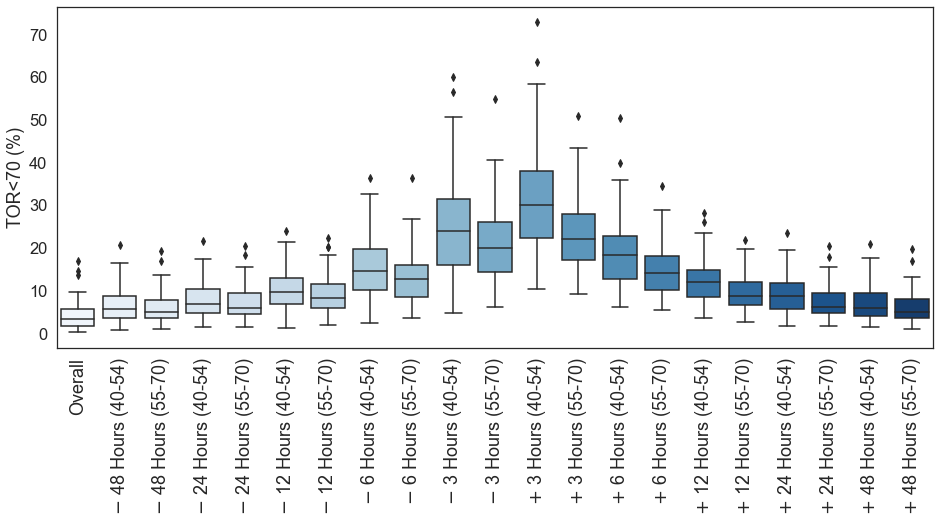

In [6]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (15.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df2.head(102), palette="Blues")


plt.ylabel("TOR<70 (%)") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-54)',  '$\minus$ 48 Hours (55-70)', 
    '$\minus$ 24 Hours (40-54)',  '$\minus$ 24 Hours (55-70)',
    '$\minus$ 12 Hours (40-54)',  '$\minus$ 12 Hours (55-70)',
    '$\minus$ 6 Hours (40-54)',  '$\minus$ 6 Hours (55-70)',
    '$\minus$ 3 Hours (40-54)',  '$\minus$ 3 Hours (55-70)',
    '$\plus$ 3 Hours (40-54)',  '$\plus$ 3 Hours (55-70)',
    '$\plus$ 6 Hours (40-54)',  '$\plus$ 6 Hours (55-70)',
    '$\plus$ 12 Hours (40-54)',  '$\plus$ 12 Hours (55-70)',
    '$\plus$ 24 Hours (40-54)',  '$\plus$ 24 Hours (55-70)',
    '$\plus$ 48 Hours (40-54)',  '$\plus$ 48 Hours (55-70)',
])

ax.tick_params(axis='x', rotation=90)

## TOR>180

In [7]:
df3 = df[[
    'TOR>180 [%] - Overall40', 
    'TOR>180 [%] - 48 Hours before BL40', 'TOR>180 [%] - 48 Hours before BL50', 'TOR>180 [%] - 48 Hours before BL60', 
    'TOR>180 [%] - 24 Hours before BL40', 'TOR>180 [%] - 24 Hours before BL50', 'TOR>180 [%] - 24 Hours before BL60', 
    'TOR>180 [%] - 12 Hours before BL40', 'TOR>180 [%] - 12 Hours before BL50', 'TOR>180 [%] - 12 Hours before BL60', 
    'TOR>180 [%] - 6 Hours before BL40', 'TOR>180 [%] - 6 Hours before BL50', 'TOR>180 [%] - 6 Hours before BL60', 
    'TOR>180 [%] - 3 Hours before BL40', 'TOR>180 [%] - 3 Hours before BL50', 'TOR>180 [%] - 3 Hours before BL60', 
    'TOR>180 [%] - 3 Hours after BL40', 'TOR>180 [%] - 3 Hours after BL50', 'TOR>180 [%] - 3 Hours after BL60',  
    'TOR>180 [%] - 6 Hours after BL40', 'TOR>180 [%] - 6 Hours after BL50', 'TOR>180 [%] - 6 Hours after BL60', 
    'TOR>180 [%] - 12 Hours after BL40', 'TOR>180 [%] - 12 Hours after BL50', 'TOR>180 [%] - 12 Hours after BL60', 
    'TOR>180 [%] - 24 Hours after BL40', 'TOR>180 [%] - 24 Hours after BL50', 'TOR>180 [%] - 24 Hours after BL60', 
    'TOR>180 [%] - 48 Hours after BL40', 'TOR>180 [%] - 48 Hours after BL50', 'TOR>180 [%] - 48 Hours after BL60',  
]]

# Replace infinite updated data with nan
df3.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df3.dropna(inplace=True)

data_statistics(df3, 'TOR>180 [%] - Overall40')

,mean,std,min,25%,50%,75%,max,pvalue-shapirowilk,pvalue-ztest,pvalue-kstest
TOR>180 [%] - Overall40,18.92,9.78,0.80,12.98,17.99,25.52,49.67,0.22,,
TOR>180 [%] - 48 Hours before BL40,18.63,10.15,0.00,11.24,18.36,23.77,53.05,<0.05,0.836,0.971
TOR>180 [%] - 48 Hours before BL50,17.97,9.63,1.47,11.31,17.02,24.35,49.65,0.062,0.482,0.825
TOR>180 [%] - 48 Hours before BL60,17.97,9.63,1.47,11.31,17.02,24.35,49.65,0.062,0.482,0.825
TOR>180 [%] - 24 Hours before BL40,18.84,10.64,0.00,10.79,18.18,24.27,50.64,<0.05,0.953,0.825
TOR>180 [%] - 24 Hours before BL50,17.42,9.28,1.09,10.92,15.99,22.92,47.62,0.061,0.261,0.596
TOR>180 [%] - 24 Hours before BL60,17.42,9.28,1.09,10.92,15.99,22.92,47.62,0.061,0.261,0.596
TOR>180 [%] - 12 Hours before BL40,18.15,10.59,0.00,9.98,17.60,23.89,55.28,<0.05,0.588,0.596
TOR>180 [%] - 12 Hours before BL50,16.49,8.91,1.39,10.56,15.19,21.68,42.45,<0.05,0.063,0.118
TOR>180 [%] - 12 Hours before BL60,15.61,9.00,1.12,9.74,14.10,20.52,45.76,<0.05,<0.05,<0.05


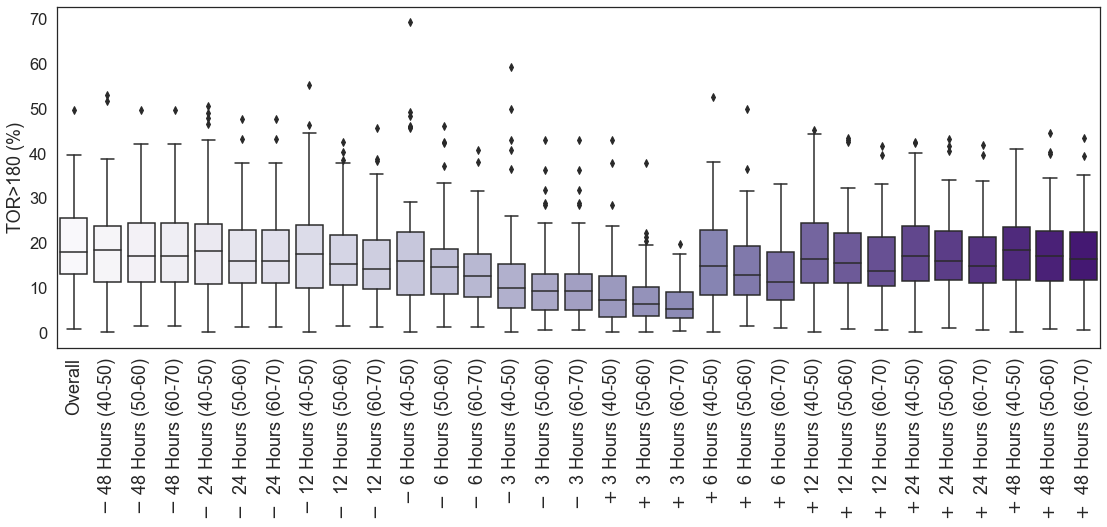

In [8]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (18.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df3.head(102), palette="Purples")

plt.ylabel("TOR>180 (%)") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-50)', '$\minus$ 48 Hours (50-60)', '$\minus$ 48 Hours (60-70)',  
    '$\minus$  24 Hours (40-50)', '$\minus$  24 Hours (50-60)', '$\minus$  24 Hours (60-70)', 
    '$\minus$ 12 Hours (40-50)', '$\minus$  12 Hours (50-60)', '$\minus$  12 Hours (60-70)', 
    '$\minus$ 6 Hours (40-50)', '$\minus$  6 Hours (50-60)', '$\minus$  6 Hours (60-70)', 
    '$\minus$ 3 Hours (40-50)', '$\minus$  3 Hours (50-60)', '$\minus$  3 Hours (60-70)', 
    '$\plus$ 3 Hours (40-50)', '$\plus$  3 Hours (50-60)', '$\plus$  3 Hours (60-70)', 
    '$\plus$ 6 Hours (40-50)', '$\plus$  6 Hours (50-60)',  '$\plus$  6 Hours (60-70)', 
    '$\plus$ 12 Hours (40-50)', '$\plus$  12 Hours (50-60)', '$\plus$  12 Hours (60-70)', 
    '$\plus$ 24 Hours (40-50)', '$\plus$  24 Hours (50-60)', '$\plus$  24 Hours (60-70)', 
    '$\plus$ 48 Hours (40-50)', '$\plus$  48 Hours (50-60)', '$\plus$  48 Hours (60-70)', 
])

ax.tick_params(axis='x', rotation=90)

In [9]:
df4 = df[[
    'TOR>180 [%] - Overall40', 
    'TOR>180 [%] - 48 Hours before BL54', 'TOR>180 [%] - 48 Hours before BL55',
    'TOR>180 [%] - 24 Hours before BL54', 'TOR>180 [%] - 24 Hours before BL55', 
    'TOR>180 [%] - 12 Hours before BL54', 'TOR>180 [%] - 12 Hours before BL55',
    'TOR>180 [%] - 6 Hours before BL54', 'TOR>180 [%] - 6 Hours before BL55',
    'TOR>180 [%] - 3 Hours before BL54', 'TOR>180 [%] - 3 Hours before BL55',
    'TOR>180 [%] - 3 Hours after BL54', 'TOR>180 [%] - 3 Hours after BL55', 
    'TOR>180 [%] - 6 Hours after BL54', 'TOR>180 [%] - 6 Hours after BL55',
    'TOR>180 [%] - 12 Hours after BL54', 'TOR>180 [%] - 12 Hours after BL55',
    'TOR>180 [%] - 24 Hours after BL54', 'TOR>180 [%] - 24 Hours after BL55',
    'TOR>180 [%] - 48 Hours after BL54', 'TOR>180 [%] - 48 Hours after BL55' 
]]

# Replace infinite updated data with nan
df4.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df4.dropna(inplace=True)

data_statistics(df4, 'TOR>180 [%] - Overall40')

,mean,std,min,25%,50%,75%,max,pvalue-shapirowilk,pvalue-ztest,pvalue-kstest
TOR>180 [%] - Overall40,18.97,9.74,0.80,13.01,18.67,25.46,49.67,0.237,,
TOR>180 [%] - 48 Hours before BL54,18.44,10.40,0.13,10.88,17.68,24.51,51.61,<0.05,0.707,0.829
TOR>180 [%] - 48 Hours before BL55,17.37,9.65,0.03,10.61,15.88,23.38,48.98,0.071,0.237,0.489
TOR>180 [%] - 24 Hours before BL54,18.19,10.17,0.26,9.77,17.34,23.65,49.54,<0.05,0.572,0.719
TOR>180 [%] - 24 Hours before BL55,16.71,9.35,0.01,9.91,15.15,22.81,46.63,0.056,0.09,0.225
TOR>180 [%] - 12 Hours before BL54,17.34,10.00,0.00,9.83,17.21,23.21,49.33,<0.05,0.236,0.225
TOR>180 [%] - 12 Hours before BL55,15.62,9.04,0.01,9.22,14.12,20.59,44.42,<0.05,<0.05,<0.05
TOR>180 [%] - 6 Hours before BL54,15.65,10.43,0.00,8.11,14.84,20.49,62.52,<0.05,<0.05,<0.05
TOR>180 [%] - 6 Hours before BL55,13.61,8.41,0.00,7.99,12.93,17.96,40.11,<0.05,<0.05,<0.05
TOR>180 [%] - 3 Hours before BL54,10.72,8.95,0.00,4.83,9.21,12.60,53.00,<0.05,<0.05,<0.05


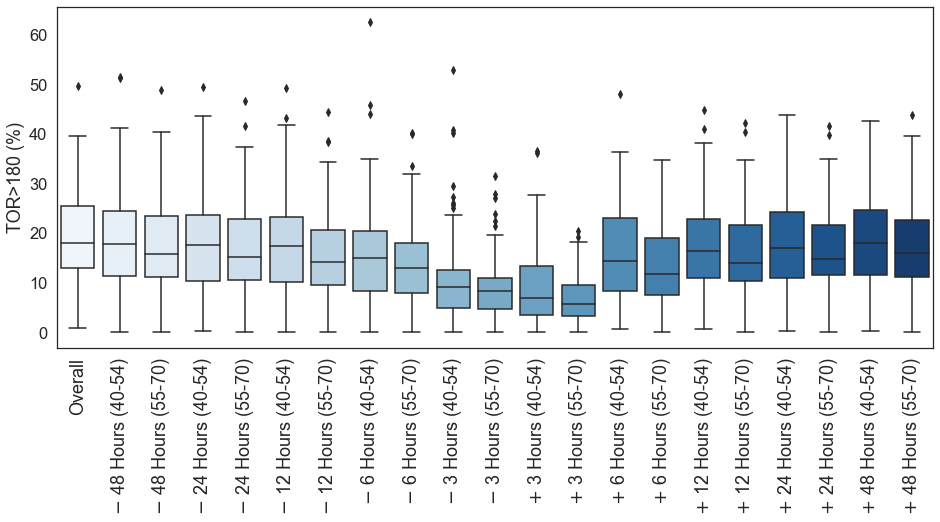

In [10]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (15.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df4.head(102), palette="Blues")


plt.ylabel("TOR>180 (%)") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-54)',  '$\minus$ 48 Hours (55-70)', 
    '$\minus$ 24 Hours (40-54)',  '$\minus$ 24 Hours (55-70)',
    '$\minus$ 12 Hours (40-54)',  '$\minus$ 12 Hours (55-70)',
    '$\minus$ 6 Hours (40-54)',  '$\minus$ 6 Hours (55-70)',
    '$\minus$ 3 Hours (40-54)',  '$\minus$ 3 Hours (55-70)',
    '$\plus$ 3 Hours (40-54)',  '$\plus$ 3 Hours (55-70)',
    '$\plus$ 6 Hours (40-54)',  '$\plus$ 6 Hours (55-70)',
    '$\plus$ 12 Hours (40-54)',  '$\plus$ 12 Hours (55-70)',
    '$\plus$ 24 Hours (40-54)',  '$\plus$ 24 Hours (55-70)',
    '$\plus$ 48 Hours (40-54)',  '$\plus$ 48 Hours (55-70)',
])

ax.tick_params(axis='x', rotation=90)

## TIR

In [11]:
df5 = df[[
    'TIR [%] - Overall40', 
    'TIR [%] - 48 Hours before BL40', 'TIR [%] - 48 Hours before BL50', 'TIR [%] - 48 Hours before BL60', 
    'TIR [%] - 24 Hours before BL40', 'TIR [%] - 24 Hours before BL50', 'TIR [%] - 24 Hours before BL60', 
    'TIR [%] - 12 Hours before BL40', 'TIR [%] - 12 Hours before BL50', 'TIR [%] - 12 Hours before BL60', 
    'TIR [%] - 6 Hours before BL40', 'TIR [%] - 6 Hours before BL50', 'TIR [%] - 6 Hours before BL60', 
    'TIR [%] - 3 Hours before BL40', 'TIR [%] - 3 Hours before BL50', 'TIR [%] - 3 Hours before BL60', 
    'TIR [%] - 3 Hours after BL40', 'TIR [%] - 3 Hours after BL50', 'TIR [%] - 3 Hours after BL60',  
    'TIR [%] - 6 Hours after BL40', 'TIR [%] - 6 Hours after BL50', 'TIR [%] - 6 Hours after BL60', 
    'TIR [%] - 12 Hours after BL40', 'TIR [%] - 12 Hours after BL50', 'TIR [%] - 12 Hours after BL60', 
    'TIR [%] - 24 Hours after BL40', 'TIR [%] - 24 Hours after BL50', 'TIR [%] - 24 Hours after BL60', 
    'TIR [%] - 48 Hours after BL40', 'TIR [%] - 48 Hours after BL50', 'TIR [%] - 48 Hours after BL60',  
]]

# Replace infinite updated data with nan
df5.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df5.dropna(inplace=True)

data_statistics(df5, 'TIR [%] - Overall40')

,mean,std,min,25%,50%,75%,max,pvalue-shapirowilk,pvalue-ztest,pvalue-kstest
TIR [%] - Overall40,76.99,8.89,49.75,71.32,77.91,83.67,96.87,0.662,,
TIR [%] - 48 Hours before BL40,74.89,9.25,38.68,70.64,75.20,80.84,93.91,<0.05,0.098,0.293
TIR [%] - 48 Hours before BL50,75.59,8.78,48.52,70.71,76.66,81.43,95.30,0.172,0.259,0.293
TIR [%] - 48 Hours before BL60,75.59,8.78,48.52,70.71,76.66,81.43,95.30,0.172,0.259,0.293
TIR [%] - 24 Hours before BL40,73.14,9.82,40.58,67.61,74.07,79.75,91.98,<0.05,<0.05,0.058
TIR [%] - 24 Hours before BL50,74.59,8.45,49.90,69.41,75.27,80.01,94.78,0.321,<0.05,0.118
TIR [%] - 24 Hours before BL60,74.59,8.45,49.90,69.41,75.27,80.01,94.78,0.321,<0.05,0.118
TIR [%] - 12 Hours before BL40,71.27,10.10,38.80,67.07,71.39,77.48,90.14,<0.05,<0.05,<0.05
TIR [%] - 12 Hours before BL50,73.05,8.46,52.79,68.19,73.21,78.27,92.04,0.098,<0.05,<0.05
TIR [%] - 12 Hours before BL60,75.32,8.22,50.33,70.45,75.73,80.67,93.81,0.085,0.164,0.163


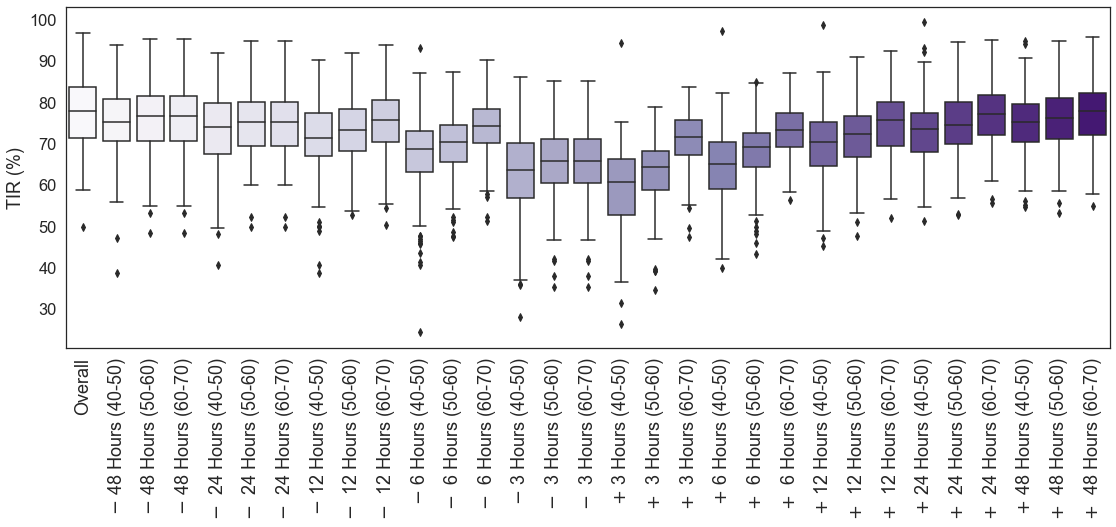

In [12]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (18.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df5.head(102), palette="Purples")

plt.ylabel("TIR (%)") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-50)', '$\minus$ 48 Hours (50-60)', '$\minus$ 48 Hours (60-70)',  
    '$\minus$  24 Hours (40-50)', '$\minus$  24 Hours (50-60)', '$\minus$  24 Hours (60-70)', 
    '$\minus$ 12 Hours (40-50)', '$\minus$  12 Hours (50-60)', '$\minus$  12 Hours (60-70)', 
    '$\minus$ 6 Hours (40-50)', '$\minus$  6 Hours (50-60)', '$\minus$  6 Hours (60-70)', 
    '$\minus$ 3 Hours (40-50)', '$\minus$  3 Hours (50-60)', '$\minus$  3 Hours (60-70)', 
    '$\plus$ 3 Hours (40-50)', '$\plus$  3 Hours (50-60)', '$\plus$  3 Hours (60-70)', 
    '$\plus$ 6 Hours (40-50)', '$\plus$  6 Hours (50-60)',  '$\plus$  6 Hours (60-70)', 
    '$\plus$ 12 Hours (40-50)', '$\plus$  12 Hours (50-60)', '$\plus$  12 Hours (60-70)', 
    '$\plus$ 24 Hours (40-50)', '$\plus$  24 Hours (50-60)', '$\plus$  24 Hours (60-70)', 
    '$\plus$ 48 Hours (40-50)', '$\plus$  48 Hours (50-60)', '$\plus$  48 Hours (60-70)', 
])

ax.tick_params(axis='x', rotation=90)

In [13]:
df6 = df[[
    'TIR [%] - Overall40', 
    'TIR [%] - 48 Hours before BL54', 'TIR [%] - 48 Hours before BL55',
    'TIR [%] - 24 Hours before BL54', 'TIR [%] - 24 Hours before BL55', 
    'TIR [%] - 12 Hours before BL54', 'TIR [%] - 12 Hours before BL55',
    'TIR [%] - 6 Hours before BL54', 'TIR [%] - 6 Hours before BL55',
    'TIR [%] - 3 Hours before BL54', 'TIR [%] - 3 Hours before BL55',
    'TIR [%] - 3 Hours after BL54', 'TIR [%] - 3 Hours after BL55', 
    'TIR [%] - 6 Hours after BL54', 'TIR [%] - 6 Hours after BL55',
    'TIR [%] - 12 Hours after BL54', 'TIR [%] - 12 Hours after BL55',
    'TIR [%] - 24 Hours after BL54', 'TIR [%] - 24 Hours after BL55',
    'TIR [%] - 48 Hours after BL54', 'TIR [%] - 48 Hours after BL55' 
]]

# Replace infinite updated data with nan
df6.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df6.dropna(inplace=True)

data_statistics(df6, 'TIR [%] - Overall40')

,mean,std,min,25%,50%,75%,max,pvalue-shapirowilk,pvalue-ztest,pvalue-kstest
TIR [%] - Overall40,76.95,8.86,49.75,71.43,77.77,83.58,96.87,0.69,,
TIR [%] - 48 Hours before BL54,75.16,9.45,39.04,69.56,75.87,81.39,94.38,<0.05,0.159,0.298
TIR [%] - 48 Hours before BL55,76.75,8.54,49.23,71.64,77.93,82.69,95.45,0.122,0.865,0.995
TIR [%] - 24 Hours before BL54,73.91,9.41,44.09,68.73,74.29,80.76,93.03,0.169,<0.05,0.086
TIR [%] - 24 Hours before BL55,76.19,8.28,50.84,70.48,77.59,81.97,94.76,0.119,0.523,0.829
TIR [%] - 12 Hours before BL54,72.23,9.83,40.93,66.14,72.22,78.03,95.14,0.718,<0.05,<0.05
TIR [%] - 12 Hours before BL55,75.20,8.21,51.67,71.13,76.19,80.68,93.56,0.065,0.14,0.167
TIR [%] - 6 Hours before BL54,68.46,10.37,32.10,63.14,68.98,74.23,91.32,0.223,<0.05,<0.05
TIR [%] - 6 Hours before BL55,72.95,7.87,50.36,69.31,73.40,78.34,89.74,<0.05,<0.05,<0.05
TIR [%] - 3 Hours before BL54,63.74,11.19,35.46,58.02,63.74,71.34,90.47,0.07,<0.05,<0.05


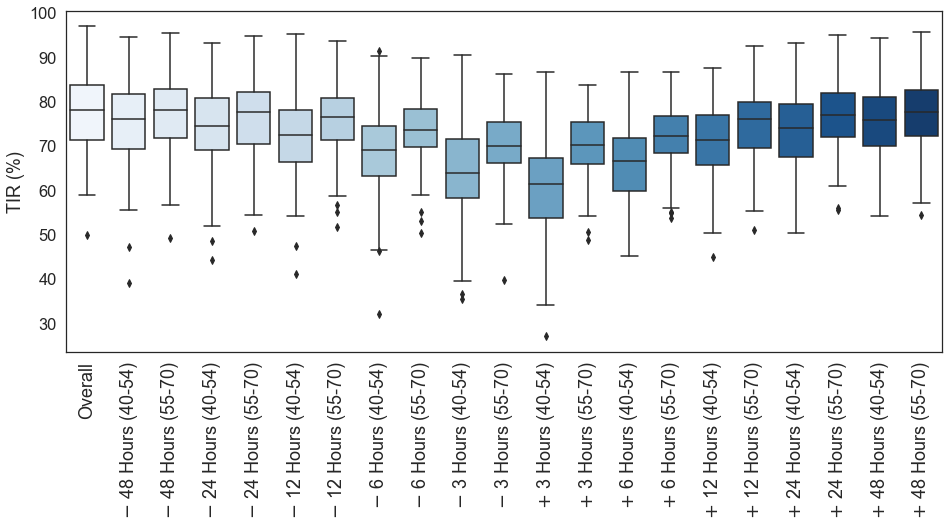

In [14]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (15.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df6.head(102), palette="Blues")

plt.ylabel("TIR (%)") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-54)',  '$\minus$ 48 Hours (55-70)', 
    '$\minus$ 24 Hours (40-54)',  '$\minus$ 24 Hours (55-70)',
    '$\minus$ 12 Hours (40-54)',  '$\minus$ 12 Hours (55-70)',
    '$\minus$ 6 Hours (40-54)',  '$\minus$ 6 Hours (55-70)',
    '$\minus$ 3 Hours (40-54)',  '$\minus$ 3 Hours (55-70)',
    '$\plus$ 3 Hours (40-54)',  '$\plus$ 3 Hours (55-70)',
    '$\plus$ 6 Hours (40-54)',  '$\plus$ 6 Hours (55-70)',
    '$\plus$ 12 Hours (40-54)',  '$\plus$ 12 Hours (55-70)',
    '$\plus$ 24 Hours (40-54)',  '$\plus$ 24 Hours (55-70)',
    '$\plus$ 48 Hours (40-54)',  '$\plus$ 48 Hours (55-70)',
])

ax.tick_params(axis='x', rotation=90)

## SD

In [15]:
df7 = df[[
    'SD - Overall40', 
    'SD - 48 Hours before BL40', 'SD - 48 Hours before BL50', 'SD - 48 Hours before BL60', 
    'SD - 24 Hours before BL40', 'SD - 24 Hours before BL50', 'SD - 24 Hours before BL60', 
    'SD - 12 Hours before BL40', 'SD - 12 Hours before BL50', 'SD - 12 Hours before BL60', 
    'SD - 6 Hours before BL40', 'SD - 6 Hours before BL50', 'SD - 6 Hours before BL60', 
    'SD - 3 Hours before BL40', 'SD - 3 Hours before BL50', 'SD - 3 Hours before BL60', 
    'SD - 3 Hours after BL40', 'SD - 3 Hours after BL50', 'SD - 3 Hours after BL60',  
    'SD - 6 Hours after BL40', 'SD - 6 Hours after BL50', 'SD - 6 Hours after BL60', 
    'SD - 12 Hours after BL40', 'SD - 12 Hours after BL50', 'SD - 12 Hours after BL60', 
    'SD - 24 Hours after BL40', 'SD - 24 Hours after BL50', 'SD - 24 Hours after BL60', 
    'SD - 48 Hours after BL40', 'SD - 48 Hours after BL50', 'SD - 48 Hours after BL60',  
]]

# Replace infinite updated data with nan
df7.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df7.dropna(inplace=True)

data_statistics(df7, 'SD - Overall40')

,mean,std,min,25%,50%,75%,max,pvalue-shapirowilk,pvalue-ztest,pvalue-kstest
SD - Overall40,50.16,10.80,21.47,43.22,50.23,58.47,77.33,0.831,,
SD - 48 Hours before BL40,48.04,10.39,26.31,40.74,47.36,54.26,76.52,0.53,0.152,0.293
SD - 48 Hours before BL50,47.03,10.29,23.23,40.32,46.67,54.06,74.72,0.91,<0.05,0.083
SD - 48 Hours before BL60,47.03,10.29,23.23,40.32,46.67,54.06,74.72,0.91,<0.05,0.083
SD - 24 Hours before BL40,47.07,10.27,26.79,40.28,46.08,53.88,76.52,0.113,<0.05,<0.05
SD - 24 Hours before BL50,45.30,9.77,23.04,39.25,44.41,52.21,71.14,0.903,<0.05,<0.05
SD - 24 Hours before BL60,45.30,9.77,23.04,39.25,44.41,52.21,71.14,0.903,<0.05,<0.05
SD - 12 Hours before BL40,44.50,10.53,26.13,37.82,43.92,50.50,84.25,<0.05,<0.05,<0.05
SD - 12 Hours before BL50,42.18,9.49,22.13,35.63,41.85,47.81,70.43,0.855,<0.05,<0.05
SD - 12 Hours before BL60,40.32,9.57,20.57,33.98,40.49,47.14,69.70,0.61,<0.05,<0.05


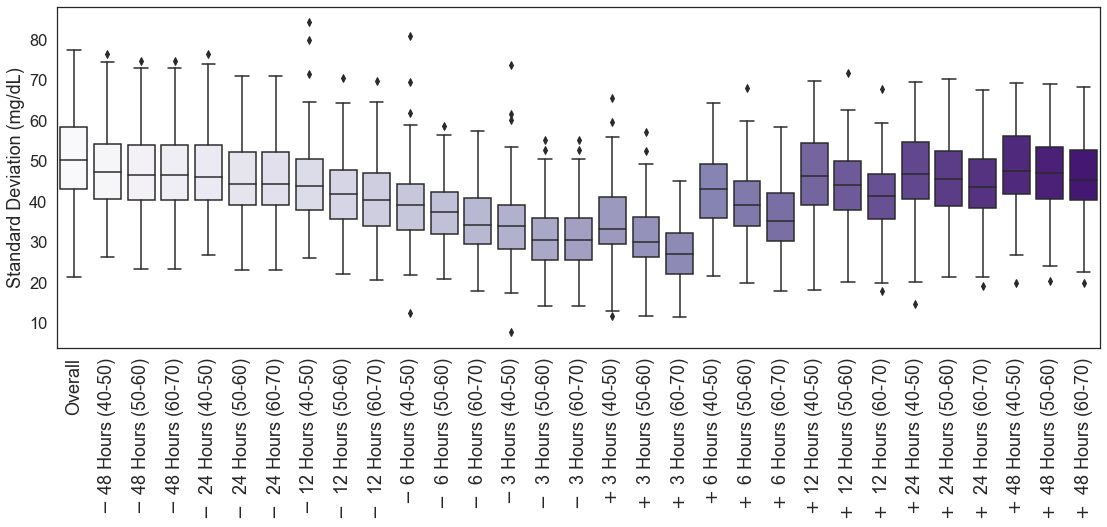

In [16]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (18.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df7.head(102), palette="Purples")

plt.ylabel("Standard Deviation (mg/dL)") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-50)', '$\minus$ 48 Hours (50-60)', '$\minus$ 48 Hours (60-70)',  
    '$\minus$  24 Hours (40-50)', '$\minus$  24 Hours (50-60)', '$\minus$  24 Hours (60-70)', 
    '$\minus$ 12 Hours (40-50)', '$\minus$  12 Hours (50-60)', '$\minus$  12 Hours (60-70)', 
    '$\minus$ 6 Hours (40-50)', '$\minus$  6 Hours (50-60)', '$\minus$  6 Hours (60-70)', 
    '$\minus$ 3 Hours (40-50)', '$\minus$  3 Hours (50-60)', '$\minus$  3 Hours (60-70)', 
    '$\plus$ 3 Hours (40-50)', '$\plus$  3 Hours (50-60)', '$\plus$  3 Hours (60-70)', 
    '$\plus$ 6 Hours (40-50)', '$\plus$  6 Hours (50-60)',  '$\plus$  6 Hours (60-70)', 
    '$\plus$ 12 Hours (40-50)', '$\plus$  12 Hours (50-60)', '$\plus$  12 Hours (60-70)', 
    '$\plus$ 24 Hours (40-50)', '$\plus$  24 Hours (50-60)', '$\plus$  24 Hours (60-70)', 
    '$\plus$ 48 Hours (40-50)', '$\plus$  48 Hours (50-60)', '$\plus$  48 Hours (60-70)', 
])

ax.tick_params(axis='x', rotation=90)

In [17]:
df8 = df[[
    'SD - Overall40', 
    'SD - 48 Hours before BL54', 'SD - 48 Hours before BL55',
    'SD - 24 Hours before BL54', 'SD - 24 Hours before BL55', 
    'SD - 12 Hours before BL54', 'SD - 12 Hours before BL55',
    'SD - 6 Hours before BL54', 'SD - 6 Hours before BL55',
    'SD - 3 Hours before BL54', 'SD - 3 Hours before BL55',
    'SD - 3 Hours after BL54', 'SD - 3 Hours after BL55', 
    'SD - 6 Hours after BL54', 'SD - 6 Hours after BL55',
    'SD - 12 Hours after BL54', 'SD - 12 Hours after BL55',
    'SD - 24 Hours after BL54', 'SD - 24 Hours after BL55',
    'SD - 48 Hours after BL54', 'SD - 48 Hours after BL55' 
]]

# Replace infinite updated data with nan
df8.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df8.dropna(inplace=True)

data_statistics(df8, 'SD - Overall40')

,mean,std,min,25%,50%,75%,max,pvalue-shapirowilk,pvalue-ztest,pvalue-kstest
SD - Overall40,50.24,10.78,21.47,43.26,50.68,58.35,77.33,0.777,,
SD - 48 Hours before BL54,47.43,10.99,16.16,40.63,46.81,55.05,76.87,0.978,0.064,0.167
SD - 48 Hours before BL55,45.73,10.76,12.81,38.74,44.78,52.43,75.34,0.924,<0.05,<0.05
SD - 24 Hours before BL54,46.10,10.62,17.35,39.40,46.10,52.37,71.85,0.582,<0.05,<0.05
SD - 24 Hours before BL55,43.77,10.35,12.57,37.24,42.44,50.52,68.49,0.879,<0.05,<0.05
SD - 12 Hours before BL54,43.26,10.50,21.34,35.88,42.71,49.85,77.83,0.296,<0.05,<0.05
SD - 12 Hours before BL55,40.20,10.02,11.73,34.06,38.89,46.40,65.97,0.718,<0.05,<0.05
SD - 6 Hours before BL54,38.64,9.45,19.16,31.90,38.55,45.09,67.15,0.233,<0.05,<0.05
SD - 6 Hours before BL55,35.07,8.96,10.83,29.74,34.66,40.54,56.56,0.475,<0.05,<0.05
SD - 3 Hours before BL54,33.33,8.71,16.34,27.71,32.33,37.18,69.22,<0.05,<0.05,<0.05


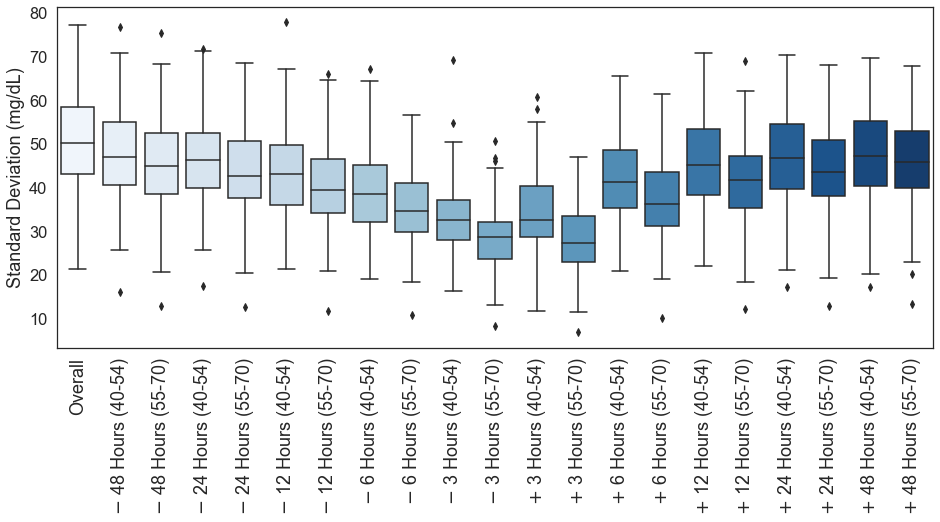

In [18]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (15.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df8.head(102), palette="Blues")

plt.ylabel("Standard Deviation (mg/dL)") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-54)',  '$\minus$ 48 Hours (55-70)', 
    '$\minus$ 24 Hours (40-54)',  '$\minus$ 24 Hours (55-70)',
    '$\minus$ 12 Hours (40-54)',  '$\minus$ 12 Hours (55-70)',
    '$\minus$ 6 Hours (40-54)',  '$\minus$ 6 Hours (55-70)',
    '$\minus$ 3 Hours (40-54)',  '$\minus$ 3 Hours (55-70)',
    '$\plus$ 3 Hours (40-54)',  '$\plus$ 3 Hours (55-70)',
    '$\plus$ 6 Hours (40-54)',  '$\plus$ 6 Hours (55-70)',
    '$\plus$ 12 Hours (40-54)',  '$\plus$ 12 Hours (55-70)',
    '$\plus$ 24 Hours (40-54)',  '$\plus$ 24 Hours (55-70)',
    '$\plus$ 48 Hours (40-54)',  '$\plus$ 48 Hours (55-70)',
])

ax.tick_params(axis='x', rotation=90)

## LBGI

In [19]:
df9 = df[[
    'LGBI - Overall40', 
    'LGBI - 48 Hours before BL40', 'LGBI - 48 Hours before BL50', 'LGBI - 48 Hours before BL60', 
    'LGBI - 24 Hours before BL40', 'LGBI - 24 Hours before BL50', 'LGBI - 24 Hours before BL60', 
    'LGBI - 12 Hours before BL40', 'LGBI - 12 Hours before BL50', 'LGBI - 12 Hours before BL60', 
    'LGBI - 6 Hours before BL40', 'LGBI - 6 Hours before BL50', 'LGBI - 6 Hours before BL60', 
    'LGBI - 3 Hours before BL40', 'LGBI - 3 Hours before BL50', 'LGBI - 3 Hours before BL60', 
    'LGBI - 3 Hours after BL40', 'LGBI - 3 Hours after BL50', 'LGBI - 3 Hours after BL60',  
    'LGBI - 6 Hours after BL40', 'LGBI - 6 Hours after BL50', 'LGBI - 6 Hours after BL60', 
    'LGBI - 12 Hours after BL40', 'LGBI - 12 Hours after BL50', 'LGBI - 12 Hours after BL60', 
    'LGBI - 24 Hours after BL40', 'LGBI - 24 Hours after BL50', 'LGBI - 24 Hours after BL60', 
    'LGBI - 48 Hours after BL40', 'LGBI - 48 Hours after BL50', 'LGBI - 48 Hours after BL60',  
]]

# Replace infinite updated data with nan
df9.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df9.dropna(inplace=True)
df9

,LGBI - Overall40,LGBI - 48 Hours before BL40,LGBI - 48 Hours before BL50,LGBI - 48 Hours before BL60,LGBI - 24 Hours before BL40,LGBI - 24 Hours before BL50,LGBI - 24 Hours before BL60,LGBI - 12 Hours before BL40,LGBI - 12 Hours before BL50,LGBI - 12 Hours before BL60,LGBI - 6 Hours before BL40,LGBI - 6 Hours before BL50,LGBI - 6 Hours before BL60,LGBI - 3 Hours before BL40,LGBI - 3 Hours before BL50,LGBI - 3 Hours before BL60,LGBI - 3 Hours after BL40,LGBI - 3 Hours after BL50,LGBI - 3 Hours after BL60,LGBI - 6 Hours after BL40,LGBI - 6 Hours after BL50,LGBI - 6 Hours after BL60,LGBI - 12 Hours after BL40,LGBI - 12 Hours after BL50,LGBI - 12 Hours after BL60,LGBI - 24 Hours after BL40,LGBI - 24 Hours after BL50,LGBI - 24 Hours after BL60,LGBI - 48 Hours after BL40,LGBI - 48 Hours after BL50,LGBI - 48 Hours after BL60
0,0.725724,0.945997,0.973272,0.973272,1.143246,1.162822,1.162822,1.423235,1.437046,1.413760,1.892053,1.904246,1.861993,10.233925,2.868089,2.868089,10.360444,3.471582,2.934633,6.089119,2.258514,1.948519,1.952320,1.612855,1.510394,2.278281,1.201851,1.154491,1.158569,0.998943,0.979787
1,1.323540,1.061195,1.253172,1.253172,1.602216,1.492487,1.492487,2.873502,2.371844,2.127981,5.691579,3.762831,2.938285,5.233091,5.989728,5.989728,6.654614,6.491234,4.615465,3.858558,4.165472,3.308754,3.955028,2.742863,2.205297,1.933925,1.692113,1.467041,1.504177,1.190537,1.172724
2,0.629758,2.106666,2.151574,2.151574,2.303997,2.339148,2.339148,2.714783,2.707093,2.630778,3.692466,3.555064,3.278712,2.668372,5.267618,5.267618,3.612206,5.942121,4.740504,2.139688,3.903156,3.321992,3.061712,2.923024,2.621167,1.078782,2.470984,2.349692,2.294638,2.208583,2.199865
3,0.677931,2.205045,2.094551,2.094551,2.508348,2.293675,2.293675,2.799940,2.546869,2.325762,3.682266,3.194669,2.749680,2.331819,4.382426,4.382426,3.579169,5.272320,3.934909,2.189809,3.676402,2.858420,3.168722,2.819605,2.355002,1.156745,2.403952,2.134476,2.266493,2.142461,1.961820
4,1.745079,0.468618,0.554941,0.554941,0.636739,0.756213,0.756213,0.888400,0.976667,0.895124,1.450626,1.454586,1.235780,6.221522,2.490280,2.490280,6.903160,3.371676,2.273160,4.221842,1.840559,1.363482,1.331970,1.274286,0.986309,2.822530,0.818505,0.710799,0.694082,0.652095,0.545867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2.423315,1.536480,0.894310,0.894310,1.704576,1.079741,1.079741,2.074742,1.447463,1.415105,2.710359,2.265409,2.046744,4.912297,3.583399,3.583399,6.647979,4.031001,3.254914,4.601717,2.321839,1.946069,2.315742,1.572636,1.402226,3.403564,1.255277,1.174175,1.605070,1.034775,0.978520
98,1.989750,0.998902,1.320474,1.320474,1.281807,1.501919,1.501919,1.650589,1.863087,1.606990,2.493227,2.518377,2.124418,4.505443,3.657431,3.657431,6.546572,4.578258,3.356115,4.198747,3.096345,2.323271,1.854585,2.124152,1.713480,2.710897,1.667251,1.437720,1.304112,1.350544,1.238926
99,0.884123,1.540662,1.734795,1.734795,1.674195,2.141758,2.141758,2.245429,2.742298,2.235553,2.975597,3.588563,3.015215,2.682889,5.032787,5.032787,3.976930,5.622106,4.139868,2.550229,3.906865,3.064686,2.495105,2.853701,2.380713,1.660125,2.165256,1.945179,1.422861,1.710983,1.647460
100,1.542023,1.744743,1.005743,1.005743,2.275601,1.207583,1.207583,2.834217,1.733154,1.430505,3.667388,2.616827,1.959919,10.840976,4.094808,4.094808,11.250857,4.612823,3.261772,8.192565,2.838685,2.092348,3.513137,1.798260,1.483571,3.757293,1.251033,1.102878,1.984081,0.982610,0.933396


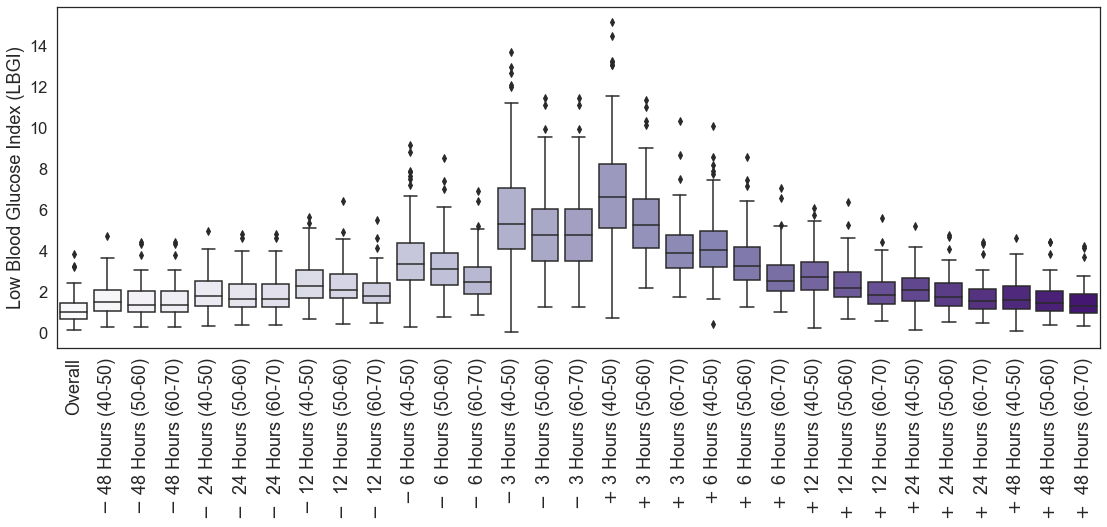

In [20]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (18.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df9.head(102), palette="Purples")

plt.ylabel("Low Blood Glucose Index (LBGI)") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-50)', '$\minus$ 48 Hours (50-60)', '$\minus$ 48 Hours (60-70)',  
    '$\minus$  24 Hours (40-50)', '$\minus$  24 Hours (50-60)', '$\minus$  24 Hours (60-70)', 
    '$\minus$ 12 Hours (40-50)', '$\minus$  12 Hours (50-60)', '$\minus$  12 Hours (60-70)', 
    '$\minus$ 6 Hours (40-50)', '$\minus$  6 Hours (50-60)', '$\minus$  6 Hours (60-70)', 
    '$\minus$ 3 Hours (40-50)', '$\minus$  3 Hours (50-60)', '$\minus$  3 Hours (60-70)', 
    '$\plus$ 3 Hours (40-50)', '$\plus$  3 Hours (50-60)', '$\plus$  3 Hours (60-70)', 
    '$\plus$ 6 Hours (40-50)', '$\plus$  6 Hours (50-60)',  '$\plus$  6 Hours (60-70)', 
    '$\plus$ 12 Hours (40-50)', '$\plus$  12 Hours (50-60)', '$\plus$  12 Hours (60-70)', 
    '$\plus$ 24 Hours (40-50)', '$\plus$  24 Hours (50-60)', '$\plus$  24 Hours (60-70)', 
    '$\plus$ 48 Hours (40-50)', '$\plus$  48 Hours (50-60)', '$\plus$  48 Hours (60-70)', 
])

ax.tick_params(axis='x', rotation=90)

In [21]:
df10 = df[[
    'LGBI - Overall40', 
    'LGBI - 48 Hours before BL54', 'LGBI - 48 Hours before BL55',
    'LGBI - 24 Hours before BL54', 'LGBI - 24 Hours before BL55', 
    'LGBI - 12 Hours before BL54', 'LGBI - 12 Hours before BL55',
    'LGBI - 6 Hours before BL54', 'LGBI - 6 Hours before BL55',
    'LGBI - 3 Hours before BL54', 'LGBI - 3 Hours before BL55',
    'LGBI - 3 Hours after BL54', 'LGBI - 3 Hours after BL55', 
    'LGBI - 6 Hours after BL54', 'LGBI - 6 Hours after BL55',
    'LGBI - 12 Hours after BL54', 'LGBI - 12 Hours after BL55',
    'LGBI - 24 Hours after BL54', 'LGBI - 24 Hours after BL55',
    'LGBI - 48 Hours after BL54', 'LGBI - 48 Hours after BL55' 
]]

# Replace infinite updated data with nan
df10.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df10.dropna(inplace=True)
df10

,LGBI - Overall40,LGBI - 48 Hours before BL54,LGBI - 48 Hours before BL55,LGBI - 24 Hours before BL54,LGBI - 24 Hours before BL55,LGBI - 12 Hours before BL54,LGBI - 12 Hours before BL55,LGBI - 6 Hours before BL54,LGBI - 6 Hours before BL55,LGBI - 3 Hours before BL54,LGBI - 3 Hours before BL55,LGBI - 3 Hours after BL54,LGBI - 3 Hours after BL55,LGBI - 6 Hours after BL54,LGBI - 6 Hours after BL55,LGBI - 12 Hours after BL54,LGBI - 12 Hours after BL55,LGBI - 24 Hours after BL54,LGBI - 24 Hours after BL55,LGBI - 48 Hours after BL54,LGBI - 48 Hours after BL55
0,0.725724,0.972582,1.001637,1.160657,1.151609,1.478367,1.421802,1.976454,1.865529,3.215723,2.755417,4.267275,2.997526,2.561544,2.040483,1.733503,1.533408,1.248750,1.166747,1.059988,0.983199
1,1.323540,1.128584,1.144245,1.505762,1.427125,2.600674,2.188579,5.057315,3.067410,9.040682,4.227505,9.540267,4.826917,5.730884,3.504644,3.671319,2.263621,2.078532,1.495743,1.331905,1.176683
2,0.629758,2.114902,2.202813,2.295988,2.378110,2.750629,2.642240,3.686523,3.332532,5.389995,4.840811,6.815900,4.954693,4.334924,3.500792,3.078915,2.669678,2.568619,2.375755,2.267391,2.203535
3,0.677931,2.180031,1.936566,2.456599,2.131288,2.779409,2.361177,3.614538,2.830447,5.052428,3.783717,6.105396,4.184145,4.101383,3.126279,3.079672,2.436665,2.558316,2.180820,2.215409,2.023880
4,1.745079,0.588479,0.508782,0.895455,0.679141,1.059898,0.905125,1.586392,1.276567,2.690232,2.186090,4.380365,2.384135,2.304655,1.481336,1.432323,1.020763,0.904592,0.721461,0.703997,0.572781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1.989750,2.586119,2.749601,2.630213,2.928136,2.850698,3.147509,3.642537,3.758347,4.831973,4.782855,6.443960,5.034141,4.630879,3.870259,3.808157,3.099753,3.289990,2.914053,2.999891,2.746661
99,0.884123,2.111916,2.175275,2.395564,2.309920,2.645107,2.405620,3.155863,2.771429,4.170629,3.452327,6.263880,3.732858,4.095150,2.941687,3.007310,2.447497,2.684170,2.256769,2.524098,2.119402
100,1.542023,0.799072,0.611952,1.228520,0.826016,2.159974,1.058710,3.911061,1.547835,7.065536,2.653853,6.830466,3.660562,3.544764,2.178519,1.994662,1.429149,1.226638,1.049569,0.770053,0.775453
101,0.665577,0.606675,0.572298,0.783929,0.710299,1.308959,0.955490,2.011365,1.328895,3.502049,2.288134,4.745427,2.817259,2.479018,1.604492,1.709399,1.020967,1.086493,0.735469,0.674829,0.546759


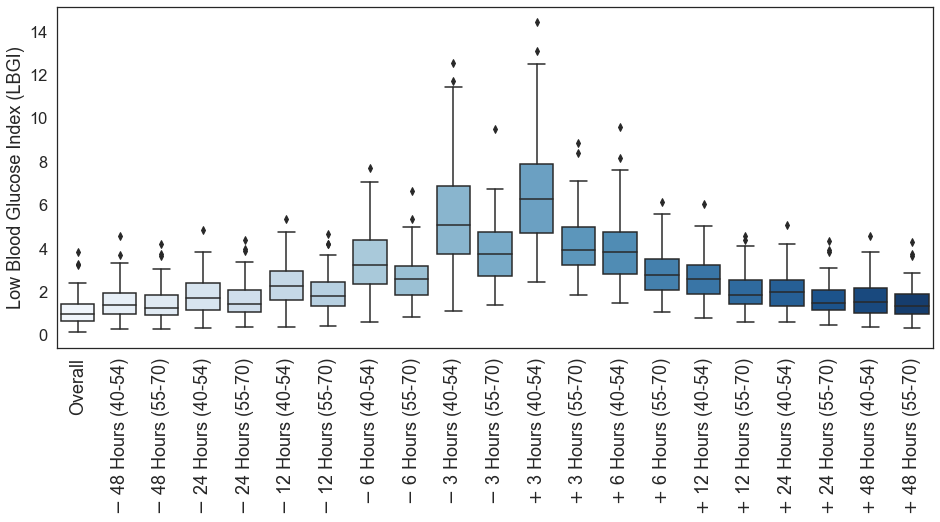

In [22]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (15.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df10.head(102), palette="Blues")

plt.ylabel("Low Blood Glucose Index (LBGI)") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-54)',  '$\minus$ 48 Hours (55-70)', 
    '$\minus$ 24 Hours (40-54)',  '$\minus$ 24 Hours (55-70)',
    '$\minus$ 12 Hours (40-54)',  '$\minus$ 12 Hours (55-70)',
    '$\minus$ 6 Hours (40-54)',  '$\minus$ 6 Hours (55-70)',
    '$\minus$ 3 Hours (40-54)',  '$\minus$ 3 Hours (55-70)',
    '$\plus$ 3 Hours (40-54)',  '$\plus$ 3 Hours (55-70)',
    '$\plus$ 6 Hours (40-54)',  '$\plus$ 6 Hours (55-70)',
    '$\plus$ 12 Hours (40-54)',  '$\plus$ 12 Hours (55-70)',
    '$\plus$ 24 Hours (40-54)',  '$\plus$ 24 Hours (55-70)',
    '$\plus$ 48 Hours (40-54)',  '$\plus$ 48 Hours (55-70)',
])

ax.tick_params(axis='x', rotation=90)

## HBGI

In [23]:
df11 = df[[
    'HBGI - Overall40', 
    'HBGI - 48 Hours before BL40', 'HBGI - 48 Hours before BL50', 'HBGI - 48 Hours before BL60', 
    'HBGI - 24 Hours before BL40', 'HBGI - 24 Hours before BL50', 'HBGI - 24 Hours before BL60', 
    'HBGI - 12 Hours before BL40', 'HBGI - 12 Hours before BL50', 'HBGI - 12 Hours before BL60', 
    'HBGI - 6 Hours before BL40', 'HBGI - 6 Hours before BL50', 'HBGI - 6 Hours before BL60', 
    'HBGI - 3 Hours before BL40', 'HBGI - 3 Hours before BL50', 'HBGI - 3 Hours before BL60', 
    'HBGI - 3 Hours after BL40', 'HBGI - 3 Hours after BL50', 'HBGI - 3 Hours after BL60',  
    'HBGI - 6 Hours after BL40', 'HBGI - 6 Hours after BL50', 'HBGI - 6 Hours after BL60', 
    'HBGI - 12 Hours after BL40', 'HBGI - 12 Hours after BL50', 'HBGI - 12 Hours after BL60', 
    'HBGI - 24 Hours after BL40', 'HBGI - 24 Hours after BL50', 'HBGI - 24 Hours after BL60', 
    'HBGI - 48 Hours after BL40', 'HBGI - 48 Hours after BL50', 'HBGI - 48 Hours after BL60',  
]]

# Replace infinite updated data with nan
df11.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df11.dropna(inplace=True)
df11

,HBGI - Overall40,HBGI - 48 Hours before BL40,HBGI - 48 Hours before BL50,HBGI - 48 Hours before BL60,HBGI - 24 Hours before BL40,HBGI - 24 Hours before BL50,HBGI - 24 Hours before BL60,HBGI - 12 Hours before BL40,HBGI - 12 Hours before BL50,HBGI - 12 Hours before BL60,HBGI - 6 Hours before BL40,HBGI - 6 Hours before BL50,HBGI - 6 Hours before BL60,HBGI - 3 Hours before BL40,HBGI - 3 Hours before BL50,HBGI - 3 Hours before BL60,HBGI - 3 Hours after BL40,HBGI - 3 Hours after BL50,HBGI - 3 Hours after BL60,HBGI - 6 Hours after BL40,HBGI - 6 Hours after BL50,HBGI - 6 Hours after BL60,HBGI - 12 Hours after BL40,HBGI - 12 Hours after BL50,HBGI - 12 Hours after BL60,HBGI - 24 Hours after BL40,HBGI - 24 Hours after BL50,HBGI - 24 Hours after BL60,HBGI - 48 Hours after BL40,HBGI - 48 Hours after BL50,HBGI - 48 Hours after BL60
0,5.408483,3.077518,3.735547,3.735547,3.223745,4.037242,4.037242,3.463313,4.351847,3.513886,4.369036,4.100612,2.944796,0.192585,2.896486,2.896486,0.136547,1.969449,1.665577,0.896485,3.250695,2.791698,3.626347,3.913072,3.084006,2.190584,3.649308,3.265847,3.274042,3.552600,3.199973
1,4.419308,4.778532,3.459804,3.459804,4.967194,3.721884,3.721884,3.115498,2.598113,2.570125,0.904603,1.153447,1.286566,2.789891,0.495596,0.495596,3.080907,0.182683,0.217379,6.887138,0.752669,0.815795,1.307222,1.533152,1.994191,5.432239,2.391844,2.877832,4.063456,4.112481,3.985295
2,5.485744,1.948629,1.863162,1.863162,2.025513,1.816338,1.816338,2.022036,1.809297,1.360410,2.037985,1.677051,1.218088,3.273633,1.122184,1.122184,3.721768,0.900880,0.621644,5.283582,1.695212,1.203114,2.065294,1.728041,1.329678,5.641685,1.674415,1.372797,1.916641,1.712255,1.433301
3,4.119171,3.454532,3.255338,3.255338,3.332545,3.141875,3.141875,3.749014,3.281164,3.029262,3.699621,3.362208,2.830231,4.349159,2.357814,2.357814,2.140804,1.820796,1.700306,3.032580,2.988996,2.748128,3.020183,3.132270,2.907541,4.289484,3.291292,2.998443,3.238418,3.209670,3.003288
4,2.792208,9.929990,9.438694,9.438694,11.113777,9.898607,9.898607,16.397834,9.765927,8.403021,19.546408,10.300193,8.017195,1.585619,6.563726,6.563726,1.459075,3.668263,4.655717,2.526994,8.061610,8.353860,7.412165,7.909666,7.908626,2.505430,8.615688,8.589241,7.593080,8.355494,8.397191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.976819,5.569686,7.099960,7.099960,5.054579,7.065787,7.065787,4.820332,5.866163,6.393821,4.536591,5.183963,5.777602,1.042277,4.393254,4.393254,0.424938,3.958163,3.581306,0.804202,7.018844,6.650857,4.357824,7.254223,6.443330,0.844379,7.158070,6.300097,5.397657,6.965298,6.522954
98,1.504840,7.506519,1.475241,1.475241,7.513982,1.482531,1.482531,6.772155,1.327652,1.155103,5.715876,1.303398,1.096425,1.947707,0.986329,0.986329,0.817870,0.789418,0.574171,1.239470,1.164320,0.990632,8.491305,1.298450,1.174201,1.749764,1.264026,1.168057,6.933640,1.341973,1.233324
99,5.856264,1.649876,3.251892,3.251892,1.802266,2.894847,2.894847,1.458114,3.067518,2.987258,1.047192,3.000512,2.653469,4.023434,2.602124,2.602124,3.764541,1.246848,1.161099,6.451859,2.641822,2.330926,1.435890,3.310410,2.680468,5.977038,3.352397,2.787463,1.376661,3.436333,3.074948
100,6.023207,2.848893,4.323423,4.323423,2.448791,4.278992,4.278992,2.919848,4.744703,3.732895,2.912586,4.546390,3.503417,3.364127,3.270563,3.270563,2.768296,1.948528,1.769504,5.128687,3.514381,3.226967,3.147702,4.105696,3.767389,6.177220,4.241612,4.002724,3.103303,4.316676,4.012749


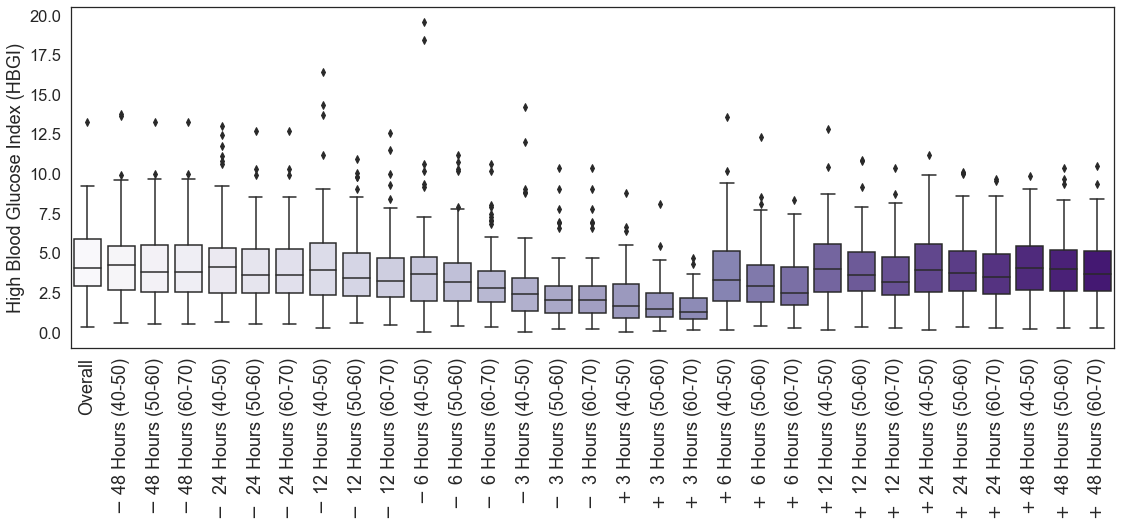

In [24]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (18.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df11.head(102), palette="Purples")

plt.ylabel("High Blood Glucose Index (HBGI)") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-50)', '$\minus$ 48 Hours (50-60)', '$\minus$ 48 Hours (60-70)',  
    '$\minus$  24 Hours (40-50)', '$\minus$  24 Hours (50-60)', '$\minus$  24 Hours (60-70)', 
    '$\minus$ 12 Hours (40-50)', '$\minus$  12 Hours (50-60)', '$\minus$  12 Hours (60-70)', 
    '$\minus$ 6 Hours (40-50)', '$\minus$  6 Hours (50-60)', '$\minus$  6 Hours (60-70)', 
    '$\minus$ 3 Hours (40-50)', '$\minus$  3 Hours (50-60)', '$\minus$  3 Hours (60-70)', 
    '$\plus$ 3 Hours (40-50)', '$\plus$  3 Hours (50-60)', '$\plus$  3 Hours (60-70)', 
    '$\plus$ 6 Hours (40-50)', '$\plus$  6 Hours (50-60)',  '$\plus$  6 Hours (60-70)', 
    '$\plus$ 12 Hours (40-50)', '$\plus$  12 Hours (50-60)', '$\plus$  12 Hours (60-70)', 
    '$\plus$ 24 Hours (40-50)', '$\plus$  24 Hours (50-60)', '$\plus$  24 Hours (60-70)', 
    '$\plus$ 48 Hours (40-50)', '$\plus$  48 Hours (50-60)', '$\plus$  48 Hours (60-70)', 
])

ax.tick_params(axis='x', rotation=90)

In [25]:
df11 = df[[
    'HBGI - Overall40', 
    'HBGI - 48 Hours before BL54', 'HBGI - 48 Hours before BL55',
    'HBGI - 24 Hours before BL54', 'HBGI - 24 Hours before BL55', 
    'HBGI - 12 Hours before BL54', 'HBGI - 12 Hours before BL55',
    'HBGI - 6 Hours before BL54', 'HBGI - 6 Hours before BL55',
    'HBGI - 3 Hours before BL54', 'HBGI - 3 Hours before BL55',
    'HBGI - 3 Hours after BL54', 'HBGI - 3 Hours after BL55', 
    'HBGI - 6 Hours after BL54', 'HBGI - 6 Hours after BL55',
    'HBGI - 12 Hours after BL54', 'HBGI - 12 Hours after BL55',
    'HBGI - 24 Hours after BL54', 'HBGI - 24 Hours after BL55',
    'HBGI - 48 Hours after BL54', 'HBGI - 48 Hours after BL55' 
]]

# Replace infinite updated data with nan
df11.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df11.dropna(inplace=True)
df11

,HBGI - Overall40,HBGI - 48 Hours before BL54,HBGI - 48 Hours before BL55,HBGI - 24 Hours before BL54,HBGI - 24 Hours before BL55,HBGI - 12 Hours before BL54,HBGI - 12 Hours before BL55,HBGI - 6 Hours before BL54,HBGI - 6 Hours before BL55,HBGI - 3 Hours before BL54,HBGI - 3 Hours before BL55,HBGI - 3 Hours after BL54,HBGI - 3 Hours after BL55,HBGI - 6 Hours after BL54,HBGI - 6 Hours after BL55,HBGI - 12 Hours after BL54,HBGI - 12 Hours after BL55,HBGI - 24 Hours after BL54,HBGI - 24 Hours after BL55,HBGI - 48 Hours after BL54,HBGI - 48 Hours after BL55
0,5.408483,3.505857,3.630851,3.712797,3.818732,4.185269,3.644846,4.529988,3.088632,3.090522,2.034123,2.044637,1.758508,3.315508,2.905859,3.346919,3.181681,3.355334,3.282689,3.334424,3.273377
1,4.419308,4.155478,3.581319,4.403499,3.777947,3.020758,2.521953,0.981604,1.248583,0.261634,0.622562,0.159420,0.216286,0.950104,0.805012,1.472116,1.923646,2.289698,2.807882,4.288567,4.010866
2,5.485744,1.942083,1.597084,1.966495,1.520605,1.973299,1.427460,1.914395,1.288441,1.419758,0.802413,1.140822,0.678098,1.908459,1.353902,1.975084,1.404645,1.797658,1.429136,1.818511,1.518931
3,4.119171,3.438774,3.095415,3.334349,3.050782,3.702677,3.048865,3.661971,2.900203,2.665939,1.946988,2.124919,1.704294,3.104112,2.820652,3.050019,2.933917,3.454001,3.046212,3.278955,3.064818
4,2.792208,9.666787,8.586168,10.162869,8.374891,11.660875,8.747437,12.871967,8.604388,6.539225,5.558751,3.154328,4.551415,9.717181,8.315968,8.391792,7.764293,9.441255,8.416639,8.692935,8.375721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1.504840,1.023473,0.834253,1.212258,0.773364,1.441520,0.718760,1.285333,0.623912,1.001698,0.432340,0.508478,0.353408,0.916571,0.776446,0.708825,0.793072,0.863477,0.849114,0.825927,0.869309
99,5.856264,2.133300,1.645092,2.065857,1.618946,2.280908,1.736946,2.413423,1.794283,2.528576,1.629855,0.892270,0.838658,1.300977,1.353847,1.803734,1.528439,1.717715,1.529391,1.665084,1.561820
100,6.023207,5.599181,5.505362,6.118234,5.508205,5.880432,5.327835,4.468216,4.896509,2.057744,2.941886,4.902061,3.040927,6.116838,4.453751,4.573859,4.381887,5.280666,4.314604,5.481216,4.512671
101,4.275821,5.132435,4.254603,4.499819,4.417268,3.819491,4.223627,3.923909,3.945599,2.276935,2.408117,1.710547,0.877205,4.244378,3.256564,6.145402,4.182108,6.042162,4.247754,4.707978,4.038586


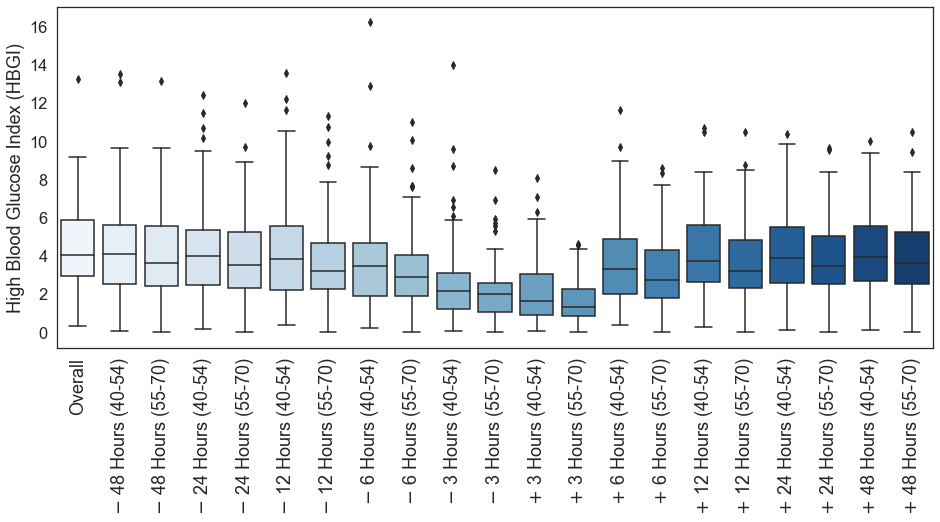

In [26]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (15.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df11.head(102), palette="Blues")

plt.ylabel("High Blood Glucose Index (HBGI)") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-54)',  '$\minus$ 48 Hours (55-70)', 
    '$\minus$ 24 Hours (40-54)',  '$\minus$ 24 Hours (55-70)',
    '$\minus$ 12 Hours (40-54)',  '$\minus$ 12 Hours (55-70)',
    '$\minus$ 6 Hours (40-54)',  '$\minus$ 6 Hours (55-70)',
    '$\minus$ 3 Hours (40-54)',  '$\minus$ 3 Hours (55-70)',
    '$\plus$ 3 Hours (40-54)',  '$\plus$ 3 Hours (55-70)',
    '$\plus$ 6 Hours (40-54)',  '$\plus$ 6 Hours (55-70)',
    '$\plus$ 12 Hours (40-54)',  '$\plus$ 12 Hours (55-70)',
    '$\plus$ 24 Hours (40-54)',  '$\plus$ 24 Hours (55-70)',
    '$\plus$ 48 Hours (40-54)',  '$\plus$ 48 Hours (55-70)',
])

ax.tick_params(axis='x', rotation=90)

## J_index

In [27]:
df12 = df[[
    'J_index - Overall40', 
    'J_index - 48 Hours before BL40', 'J_index - 48 Hours before BL50', 'J_index - 48 Hours before BL60', 
    'J_index - 24 Hours before BL40', 'J_index - 24 Hours before BL50', 'J_index - 24 Hours before BL60', 
    'J_index - 12 Hours before BL40', 'J_index - 12 Hours before BL50', 'J_index - 12 Hours before BL60', 
    'J_index - 6 Hours before BL40', 'J_index - 6 Hours before BL50', 'J_index - 6 Hours before BL60', 
    'J_index - 3 Hours before BL40', 'J_index - 3 Hours before BL50', 'J_index - 3 Hours before BL60', 
    'J_index - 3 Hours after BL40', 'J_index - 3 Hours after BL50', 'J_index - 3 Hours after BL60',  
    'J_index - 6 Hours after BL40', 'J_index - 6 Hours after BL50', 'J_index - 6 Hours after BL60', 
    'J_index - 12 Hours after BL40', 'J_index - 12 Hours after BL50', 'J_index - 12 Hours after BL60', 
    'J_index - 24 Hours after BL40', 'J_index - 24 Hours after BL50', 'J_index - 24 Hours after BL60', 
    'J_index - 48 Hours after BL40', 'J_index - 48 Hours after BL50', 'J_index - 48 Hours after BL60',  
]]

# Replace infinite updated data with nan
df12.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df12.dropna(inplace=True)

data_statistics(df12, 'J_index - Overall40')

,mean,std,min,25%,50%,75%,max,pvalue-shapirowilk,pvalue-ztest,pvalue-kstest
J_index - Overall40,36.48,10.62,15.23,29.87,35.49,43.84,73.93,0.185,,
J_index - 48 Hours before BL40,35.76,11.00,15.88,27.95,35.60,41.15,74.26,<0.05,0.631,0.596
J_index - 48 Hours before BL50,34.89,10.45,15.67,27.83,33.87,41.23,73.45,<0.05,0.28,0.293
J_index - 48 Hours before BL60,34.89,10.45,15.67,27.83,33.87,41.23,73.45,<0.05,0.28,0.293
J_index - 24 Hours before BL40,35.43,11.16,15.80,27.19,34.45,40.08,69.88,<0.05,0.49,0.293
J_index - 24 Hours before BL50,33.83,9.98,15.10,27.27,32.39,39.91,70.40,<0.05,0.066,0.118
J_index - 24 Hours before BL60,33.83,9.98,15.10,27.27,32.39,39.91,70.40,<0.05,0.066,0.118
J_index - 12 Hours before BL40,34.20,12.01,14.66,25.71,33.07,39.50,87.75,<0.05,0.151,0.163
J_index - 12 Hours before BL50,32.16,9.77,15.00,25.88,30.55,38.01,61.53,<0.05,<0.05,<0.05
J_index - 12 Hours before BL60,31.32,10.12,14.33,25.39,29.45,36.05,69.37,<0.05,<0.05,<0.05


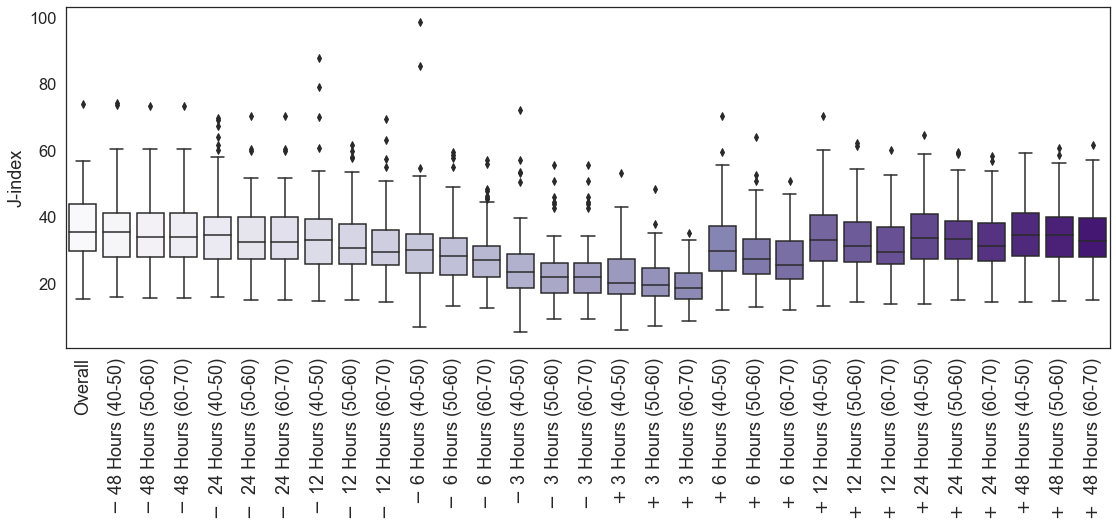

In [28]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (18.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df12.head(102), palette="Purples")

plt.ylabel("J-index") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-50)', '$\minus$ 48 Hours (50-60)', '$\minus$ 48 Hours (60-70)',  
    '$\minus$  24 Hours (40-50)', '$\minus$  24 Hours (50-60)', '$\minus$  24 Hours (60-70)', 
    '$\minus$ 12 Hours (40-50)', '$\minus$  12 Hours (50-60)', '$\minus$  12 Hours (60-70)', 
    '$\minus$ 6 Hours (40-50)', '$\minus$  6 Hours (50-60)', '$\minus$  6 Hours (60-70)', 
    '$\minus$ 3 Hours (40-50)', '$\minus$  3 Hours (50-60)', '$\minus$  3 Hours (60-70)', 
    '$\plus$ 3 Hours (40-50)', '$\plus$  3 Hours (50-60)', '$\plus$  3 Hours (60-70)', 
    '$\plus$ 6 Hours (40-50)', '$\plus$  6 Hours (50-60)',  '$\plus$  6 Hours (60-70)', 
    '$\plus$ 12 Hours (40-50)', '$\plus$  12 Hours (50-60)', '$\plus$  12 Hours (60-70)', 
    '$\plus$ 24 Hours (40-50)', '$\plus$  24 Hours (50-60)', '$\plus$  24 Hours (60-70)', 
    '$\plus$ 48 Hours (40-50)', '$\plus$  48 Hours (50-60)', '$\plus$  48 Hours (60-70)', 
])

ax.tick_params(axis='x', rotation=90)

In [29]:
df13 = df[[
    'J_index - Overall40', 
    'J_index - 48 Hours before BL54', 'J_index - 48 Hours before BL55',
    'J_index - 24 Hours before BL54', 'J_index - 24 Hours before BL55', 
    'J_index - 12 Hours before BL54', 'J_index - 12 Hours before BL55',
    'J_index - 6 Hours before BL54', 'J_index - 6 Hours before BL55',
    'J_index - 3 Hours before BL54', 'J_index - 3 Hours before BL55',
    'J_index - 3 Hours after BL54', 'J_index - 3 Hours after BL55', 
    'J_index - 6 Hours after BL54', 'J_index - 6 Hours after BL55',
    'J_index - 12 Hours after BL54', 'J_index - 12 Hours after BL55',
    'J_index - 24 Hours after BL54', 'J_index - 24 Hours after BL55',
    'J_index - 48 Hours after BL54', 'J_index - 48 Hours after BL55' 
]]

# Replace infinite updated data with nan
df13.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df13.dropna(inplace=True)

data_statistics(df13, 'J_index - Overall40')

,mean,std,min,25%,50%,75%,max,pvalue-shapirowilk,pvalue-ztest,pvalue-kstest
J_index - Overall40,36.48,10.56,15.23,30.04,35.51,43.81,73.93,0.188,,
J_index - 48 Hours before BL54,35.42,11.26,11.12,27.59,34.66,41.81,73.37,<0.05,0.484,0.719
J_index - 48 Hours before BL55,34.17,10.53,9.71,27.34,32.80,40.72,73.18,0.121,0.116,0.298
J_index - 24 Hours before BL54,34.64,10.83,11.88,26.42,33.75,40.61,67.70,<0.05,0.215,0.298
J_index - 24 Hours before BL55,33.06,10.13,9.60,26.35,31.49,38.53,66.99,0.212,<0.05,<0.05
J_index - 12 Hours before BL54,33.25,11.01,13.82,24.77,32.60,40.01,75.92,<0.05,<0.05,0.086
J_index - 12 Hours before BL55,31.22,10.13,9.22,25.19,29.32,35.51,62.78,<0.05,<0.05,<0.05
J_index - 6 Hours before BL54,30.01,10.77,11.96,22.53,29.31,34.73,78.49,<0.05,<0.05,<0.05
J_index - 6 Hours before BL55,27.85,9.35,8.61,22.09,27.16,31.69,58.47,<0.05,<0.05,<0.05
J_index - 3 Hours before BL54,23.95,9.55,9.22,18.31,22.54,26.64,71.40,<0.05,<0.05,<0.05


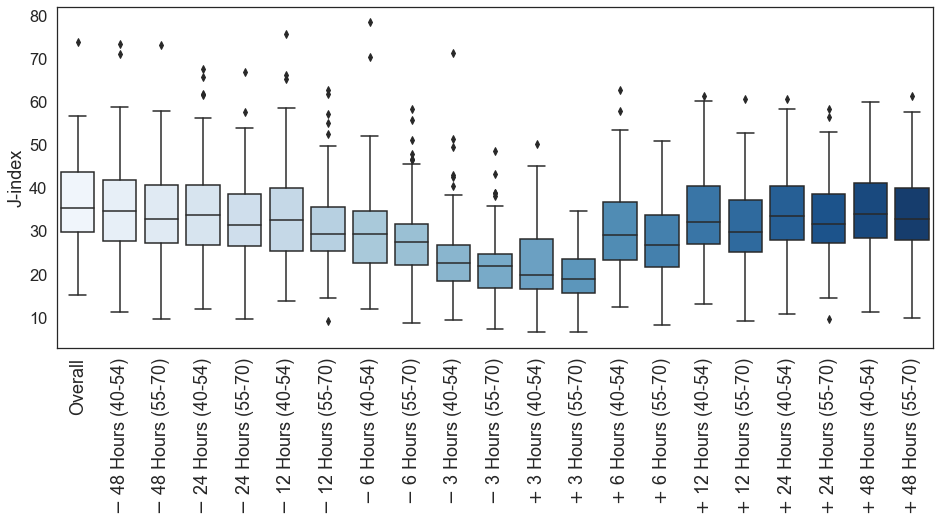

In [30]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize': (15.7, 6.27)}, font_scale=1.5)
#ax = sns.swarmplot(data=df1, color=".55")

sns.set_style(style='white')

ax = sns.boxplot(data=df13.head(102), palette="Blues")

plt.ylabel("J-index") 

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)

ax.set_xticklabels([
    'Overall', 
    '$\minus$ 48 Hours (40-54)',  '$\minus$ 48 Hours (55-70)', 
    '$\minus$ 24 Hours (40-54)',  '$\minus$ 24 Hours (55-70)',
    '$\minus$ 12 Hours (40-54)',  '$\minus$ 12 Hours (55-70)',
    '$\minus$ 6 Hours (40-54)',  '$\minus$ 6 Hours (55-70)',
    '$\minus$ 3 Hours (40-54)',  '$\minus$ 3 Hours (55-70)',
    '$\plus$ 3 Hours (40-54)',  '$\plus$ 3 Hours (55-70)',
    '$\plus$ 6 Hours (40-54)',  '$\plus$ 6 Hours (55-70)',
    '$\plus$ 12 Hours (40-54)',  '$\plus$ 12 Hours (55-70)',
    '$\plus$ 24 Hours (40-54)',  '$\plus$ 24 Hours (55-70)',
    '$\plus$ 48 Hours (40-54)',  '$\plus$ 48 Hours (55-70)',
])

ax.tick_params(axis='x', rotation=90)